In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
# Load the input image
image = cv2.imread('/content/test1.png')

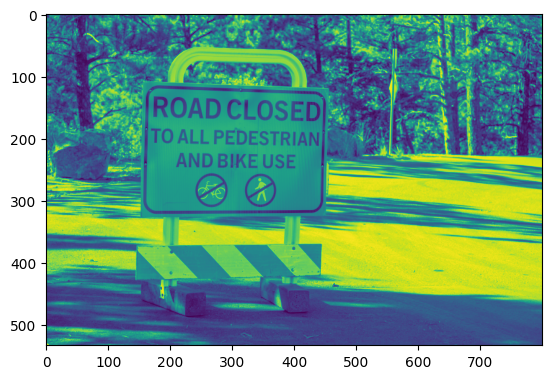

In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

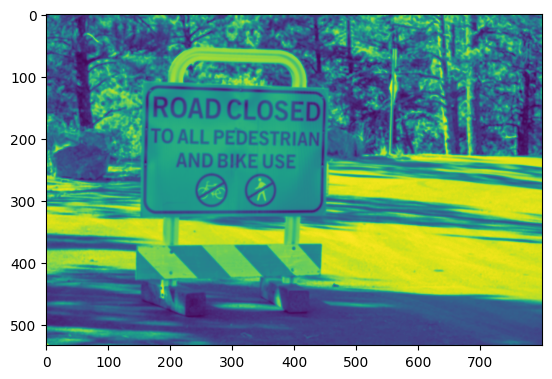

In [ ]:
# Apply Gaussian blur for noise reduction
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
plt.imshow(blurred_image)

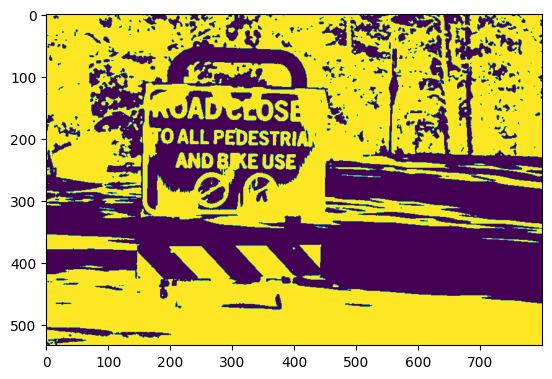

In [ ]:
# Perform image binarization using adaptive thresholding
_, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_image)

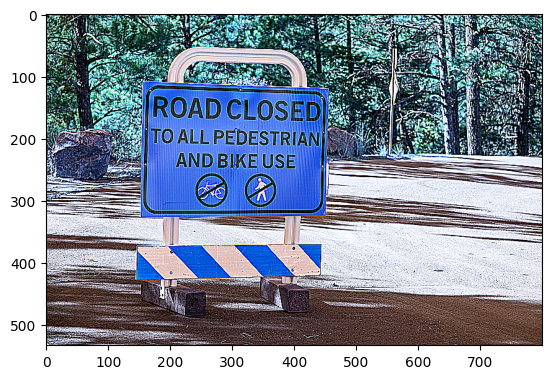

In [ ]:

# Apply the sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
plt.imshow(sharpened_image)


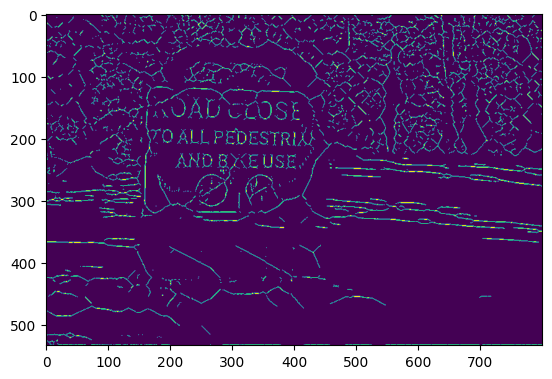

In [ ]:
# Apply skeletonization using the Zhang-Suen algorithm
def skeletonize(image):
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)

    ret, img = cv2.threshold(image, 127, 255, 0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(img, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros == size:
            done = True

    return skel

# Perform skeletonization
skeletonized_image = skeletonize(binary_image)
plt.imshow(skeletonized_image)

Number of pixels in contour: 2.0
Number of pixels in contour: 1.0
Number of pixels in contour: 24.5
Number of pixels in contour: 0.0
Number of pixels in contour: 0.0
Number of pixels in contour: 0.0
Number of pixels in contour: 0.0
Number of pixels in contour: 149.0
Number of pixels in contour: 0.0
Number of pixels in contour: 0.0
Number of pixels in contour: 48.0
Number of pixels in contour: 6.0
Number of pixels in contour: 80416.0
Number of pixels in contour: 629.0
Number of pixels in contour: 87.0
Number of pixels in contour: 2667.0
Number of pixels in contour: 98.0
Number of pixels in contour: 7.0
Number of pixels in contour: 0.0
Number of pixels in contour: 274.5
Number of pixels in contour: 5.0
Number of pixels in contour: 42.0
Number of pixels in contour: 59.5
Number of pixels in contour: 0.0
Number of pixels in contour: 192.0
Number of pixels in contour: 193.5
Number of pixels in contour: 3.0
Number of pixels in contour: 51.0
Number of pixels in contour: 0.0
Number of pixels in

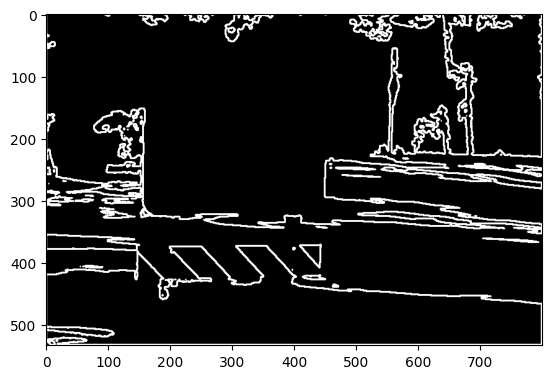

In [ ]:
# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize an image to draw the contours
contour_image = np.zeros_like(binary_image)

# Iterate through contours and calculate number of pixels
for contour in contours:
    # Calculate number of pixels for each contour
    num_pixels = cv2.contourArea(contour)
    print(f"Number of pixels in contour: {num_pixels}")

    # Draw the contour on the image
    cv2.drawContours(contour_image, [contour], 0, 255, 2)

plt.imshow(contour_image, cmap='gray')


In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 39.6 MB/s eta 0:00:00


In [ ]:
import easyocr

In [ ]:
# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
# detect text on image
text_ = reader.readtext(image)

([[166, 126], [448, 126], [448, 182], [166, 182]], 'ROAD CLOSED', 0.9994066640174729)
([[167, 181], [447, 181], [447, 221], [167, 221]], 'TO ALL PEDESTRIAN', 0.9704424028567015)
([[209, 220], [409, 220], [409, 258], [209, 258]], 'AND BIKE USE', 0.9281837358273326)


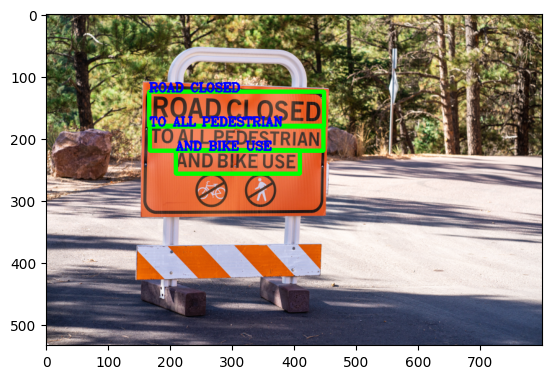

In [ ]:
threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(image, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(image, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()